<a href="https://colab.research.google.com/github/fillerInk/MNIST/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST 


My effort to create the classic hello world eaxmple of deep learning, the hand-written digit classifier using artificial neural networks

In [0]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [0]:
X_train, y_train

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [0]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [0]:
X_train = np.array(X_train)
y_train = np.array(y_train)

Label: 5


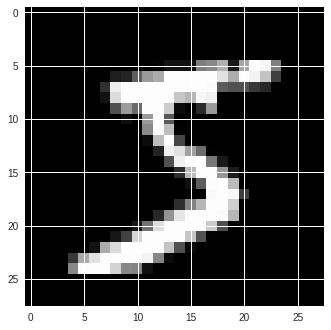

Label: 0


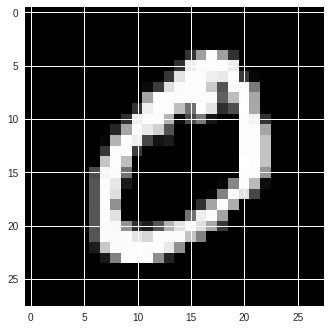

Label: 4


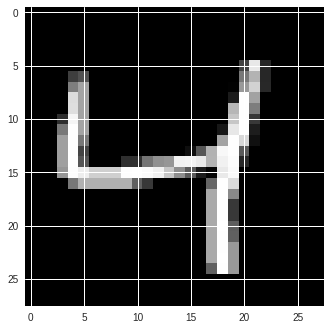

Label: 1


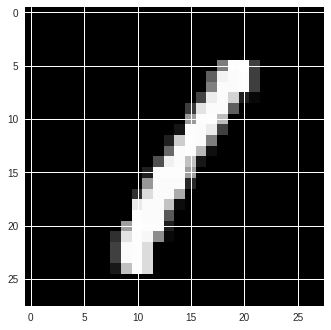

Label: 9


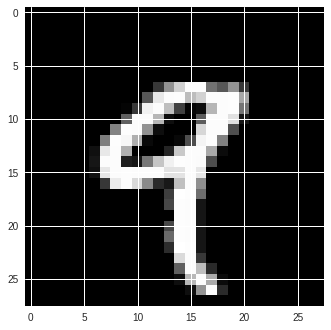

Label: 2


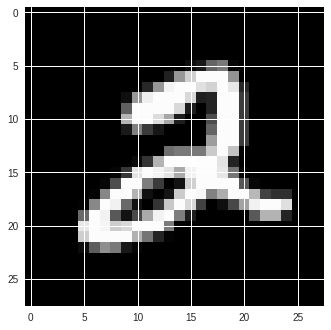

Label: 1


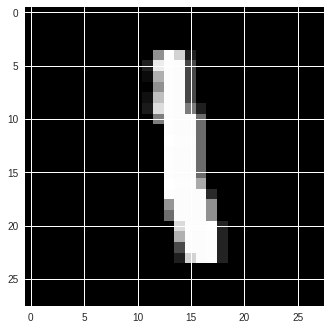

Label: 3


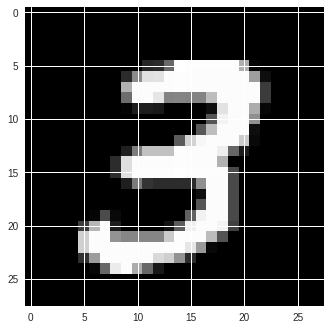

Label: 1


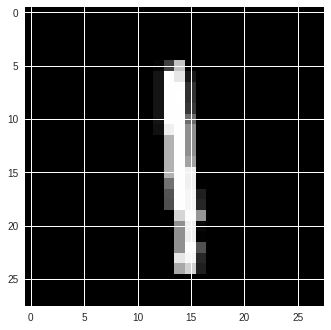

Label: 4


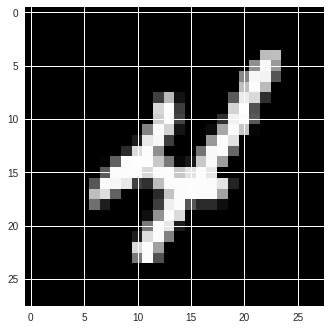

In [0]:


for index, image in enumerate(X_train[:10]):
    print ('Label:', y_train[index])
 
    plt.imshow(image.reshape(28,28),cmap='gray')
    plt.show()

In [0]:
class NeuralNetwork(object):
  def __init__(self):
    self.inputLayerSize = 784
    self.outputLayerSize = 10
    self.hiddenLayerSize = 16
    
    self.w1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
    self.w2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
    
    self.x = np.zeros((1,784))
  
  def forward(self,x):
    self.z2 = np.dot(self.x,self.w1)
    self.a2 = self.sigmoid(self.z2)
    self.z3 = np.dot(self.a2,self.w2)
    y_hat = self.sigmoid(self.z3)
    return y_hat
  
  
  def sigmoid(self,x):
    return 1/(1+np.exp(-x))
  
  def sigmoidPrime(self,z):
    #Gradient of sigmoid
    return np.exp(-z)/((1+np.exp(-z))**2)
    
  def costFunction(self, X, y):
    self.yHat = self.forward(X)
    J = 0.5*sum((y-self.yHat)**2)
    return J
        
  def costFunctionPrime(self, X, y):
    #Compute derivative with respect to W and W2 for a given X and y:
    self.yHat = self.forward(X)
        
    delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
    dJdW2 = np.dot(self.a2.T, delta3)
        
    delta2 = np.dot(delta3, self.w2.T)*self.sigmoidPrime(self.z2)
    dJdW1 = np.dot(X.T, delta2)  
        
    return dJdW1, dJdW2
    

In [0]:
X_train[:10].shape

(10, 28, 28)

In [0]:
neuron = NeuralNetwork()

In [0]:
y_hat = neuron.forward(X_train[0].flatten)
y_hat

array([[0.46655973, 0.41829045, 0.36420271, 0.81182807, 0.42001532,
        0.14526694, 0.32497763, 0.8406287 , 0.64079332, 0.23559846]])

In [0]:
cost1 = neuron.costFunction(X_train[0],y_train[0])


In [0]:
dJdW1, dJdW2 = neuron.costFunctionPrime(X_train[0],y_train[0])


ValueError: ignored